In [1]:
import re
import os
import tempfile
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_recommenders as tfrs

from typing import Dict, Text
from datetime import datetime
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

In [2]:
users_df = pd.read_csv('../data/users.csv')
users_df.head()

,user_id,user_name,user_gender,user_birth_date,user_age,user_location,user_tags,user_preferences
0,ba01ce05-a24e-4fc6-8c53-21b1faa624a9,Manuella Beatrice,P,5/27/2002,21,"Banten, Serang",Bernyanyi|Independen|Membaca|Disiplin|Menulis,Ingin memiliki teman yang bisa diajak kulinera...
1,ebeac7d2-642f-42a6-9175-6eb86dbcf84d,Achmad Irvan Hakim,L,10/21/2003,20,"Kalimantan Timur, Bontang",Pecinta alam|Membaca|Kritis|Memasak|Ngopi,"Teman yang enak di ajak ngapa ngaapin (mabar,j..."
2,25fe48f2-a312-421d-8751-984b5e4a448f,Lubna Mawaddah,P,1/12/2003,20,"Jawa Tengah, Semarang",Puzzle|Bernyanyi|Penerjemah|Kecerdasan buatan|...,"Saya ingin teman yang bisa diajak kulineran, k..."
3,f5b01cb5-d06c-41fc-880a-694d9c74e96c,Fajar Ramadhan,L,10/27/2005,18,"Jawa Barat, Tasikmalaya",Olahraga|Analis keamanan|Memanjat|Binaraga|Han...,"Temen yang bisa diajak belajar, diskusi terkai..."
4,b8307662-eb4f-4222-845e-771736274160,Gede Putra Nugraha,L,6/19/2002,21,"Jawa Barat, Cirebon",Dokter|Analitis|Kuliner|Musisi|Sosmed,Saya ingin teman yang bisa diajak berkembang b...


In [3]:
talents_df = pd.read_csv('../data/talents.csv')
talents_df.head()

,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description
0,fc0f6e4b-c397-40a4-a24c-d08b92aedc45,Pribadi Anwar Wicaksono,L,24/4/1992,31,"Banten, Cilegon",Badminton|Berjiwa petualang|Kpopers|Hiking|Ola...,"Saya sangat menyukai Kpop, girlband favorit sa..."
1,674c14d8-ed13-471a-aabf-ceef4e5bc44b,Perdana Anshari,L,10/3/2005,18,"Kalimantan Utara, Tarakan",Desain|Inovatif|Optimis|Seniman|Kreatif,Saya adalah seorang seniman visual yang mencin...
2,f2427a83-eb72-47dd-aeaf-cf131b5cefa2,Dwi Nur Septasya Nahda,P,10/3/2002,21,"Sumatera Selatan, Pagaralam",Petualangan|Bersepeda|Kutu buku|Traveling|Kuliner,Pecinta kuliner dan petualangan! Saya suka men...
3,ac56a04d-aa98-4591-8e8c-2b188040c114,Asmara Tamara Liranda,P,31/3/1992,31,"Sumatera Barat, Lima Puluh Kota",Analitis|Coding|Inovatif|Teknologi|Programmer,Seorang pengembang perangkat lunak yang bersem...
4,d7a31753-7f7a-4d3a-80ec-bca26e578735,Adisyafitri Oky Septasya,P,12/7/1990,33,"Kalimantan Timur, Samarinda",Ambisius|Membaca|Cerdas|Pengajar|Visioner,Pengajar bahasa Inggris yang juga pencinta lit...


In [4]:
reviews_df = pd.read_csv('../data/reviews.csv')
reviews_df.head()

,user_id,talent_id,rating,review
0,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,4,"Talent ini sangat kreatif dalam fotografi, has..."
1,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,d9b90682-f5b4-45f7-b1ed-8b8044c945e1,3,"Kemampuan olahraga talent ini memuaskan, tetap..."
2,bc92f639-6659-4732-ad42-cc62b377f811,1b18b89b-5434-422d-b2d9-294e4c64657e,5,Sangat puas dengan pengalaman kuliner bersama ...
3,9a8427dd-ef41-46d9-86fe-063129e8190e,931c2814-1f84-404f-851a-7fb075835d95,4,Talent ini memberikan konsultasi bisnis yang s...
4,0e9ced1a-35a0-4ad5-a204-3d5c843de78f,ddc39acb-d29b-43f0-abcd-f54fe7be2904,2,Kemampuan gym dan jogging talent ini tidak ses...


### Merging reviews with users and talents

In [5]:
ratings_df = pd.merge(pd.merge(reviews_df, talents_df, on='talent_id'), users_df, on='user_id')

In [6]:
ratings_df.head()

,user_id,talent_id,rating,review,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,user_name,user_gender,user_birth_date,user_age,user_location,user_tags,user_preferences
0,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,4,"Talent ini sangat kreatif dalam fotografi, has...",Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...,Irgi,L,7/3/2002,21,"Jawa Timur, Pasuruan",Astrografi|Menggambar|Ambisius|Ahli nutrisi|Tr...,"Yang bisa diajak tukeran gambar, ngobrolin hal..."
1,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,d9b90682-f5b4-45f7-b1ed-8b8044c945e1,3,"Kemampuan olahraga talent ini memuaskan, tetap...",Tedi Febrianto Arya,L,7/10/1979,44,"Sumatera Utara, Pematangsiantar",Badminton|Cerdas|Pengajar|Ramah|Olahraga,Seorang mantan pemain bulu tangkis yang berali...,Irgi,L,7/3/2002,21,"Jawa Timur, Pasuruan",Astrografi|Menggambar|Ambisius|Ahli nutrisi|Tr...,"Yang bisa diajak tukeran gambar, ngobrolin hal..."
2,600687d6-bf67-406d-a50e-768e3d2dd53d,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,3,Fotografer talent ini memiliki kemampuan yang ...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...,Irhamulloh Angga Taufik,L,18/2/1997,26,"Banten, Cilegon",Cerdas|Seni|Berkebun|Grafity|Pelukis,"Seorang pelukis yang suka seni, grafity, berke..."
3,6a58a9cc-b016-4ff3-83d4-c41e735bf4df,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,5,Talent ini memiliki keterampilan mendengarkan ...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...,Kevin Setiawan,L,9/13/2000,23,"Sumatera Utara, Binjai",Konsultan|Dokter|Sepak bola|Pet lovers|Memancing,"Biasa diajak seneng bareng, maen game bareng, ..."
4,6a58a9cc-b016-4ff3-83d4-c41e735bf4df,167c23a2-5f3d-48f1-87a5-e7e8b4ce8e44,3,Secara umum ok. Kemampuan bersepeda dan berkeb...,Sayid Bryan Karim Restiantoro,L,26/8/1978,45,"Jawa Timur, Mojokerto",Penyanyi|Musisi|Kreatif|Psikolog|Ramah,Pecinta musik yang memiliki kecintaan pada ber...,Kevin Setiawan,L,9/13/2000,23,"Sumatera Utara, Binjai",Konsultan|Dokter|Sepak bola|Pet lovers|Memancing,"Biasa diajak seneng bareng, maen game bareng, ..."


In [7]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             1026 non-null   object
 1   talent_id           1026 non-null   object
 2   rating              1026 non-null   int64 
 3   review              1026 non-null   object
 4   talent_name         1026 non-null   object
 5   talent_gender       1026 non-null   object
 6   talent_birth_date   1026 non-null   object
 7   talent_age          1026 non-null   int64 
 8   talent_location     1026 non-null   object
 9   talent_tags         1026 non-null   object
 10  talent_description  1026 non-null   object
 11  user_name           1026 non-null   object
 12  user_gender         1026 non-null   object
 13  user_birth_date     1026 non-null   object
 14  user_age            1026 non-null   int64 
 15  user_location       1026 non-null   object
 16  user_tags           1026

### Preprocessing data

In [8]:
genders_encoder = LabelEncoder()
genders = ratings_df["user_gender"].unique()

In [9]:
genders_encoder.fit(genders)

LabelEncoder()

In [10]:
# ratings_df.loc[:, "user_gender"] = genders_encoder.transform(ratings_df["user_gender"])
# ratings_df.loc[:, "talent_gender"] = genders_encoder.transform(ratings_df["talent_gender"])

In [11]:
tags = pd.read_csv('../data/tags.csv')
unique_tags = np.unique(tags['tag'])

In [12]:
tags_encoder = LabelEncoder()
tags_encoder.fit(unique_tags)

LabelEncoder()

In [13]:
# ratings_df["user_tags"] = ratings_df["user_tags"].apply(
#     lambda x: tags_encoder.transform(str(x).split("|"))
# )
# ratings_df["talent_tags"] = ratings_df["talent_tags"].apply(
#     lambda x: tags_encoder.transform(str(x).split("|"))
# )

In [14]:
ratings_df.head()

,user_id,talent_id,rating,review,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description,user_name,user_gender,user_birth_date,user_age,user_location,user_tags,user_preferences
0,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,4,"Talent ini sangat kreatif dalam fotografi, has...",Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...,Irgi,L,7/3/2002,21,"Jawa Timur, Pasuruan",Astrografi|Menggambar|Ambisius|Ahli nutrisi|Tr...,"Yang bisa diajak tukeran gambar, ngobrolin hal..."
1,5de6b455-0a80-4047-90e7-8ddee7ee2bb8,d9b90682-f5b4-45f7-b1ed-8b8044c945e1,3,"Kemampuan olahraga talent ini memuaskan, tetap...",Tedi Febrianto Arya,L,7/10/1979,44,"Sumatera Utara, Pematangsiantar",Badminton|Cerdas|Pengajar|Ramah|Olahraga,Seorang mantan pemain bulu tangkis yang berali...,Irgi,L,7/3/2002,21,"Jawa Timur, Pasuruan",Astrografi|Menggambar|Ambisius|Ahli nutrisi|Tr...,"Yang bisa diajak tukeran gambar, ngobrolin hal..."
2,600687d6-bf67-406d-a50e-768e3d2dd53d,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,3,Fotografer talent ini memiliki kemampuan yang ...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...,Irhamulloh Angga Taufik,L,18/2/1997,26,"Banten, Cilegon",Cerdas|Seni|Berkebun|Grafity|Pelukis,"Seorang pelukis yang suka seni, grafity, berke..."
3,6a58a9cc-b016-4ff3-83d4-c41e735bf4df,6742ab46-c8ca-4acc-99b2-9ba1c5bfccb6,5,Talent ini memiliki keterampilan mendengarkan ...,Muhammad Hamzah,L,21/12/1991,32,"Sulawesi Utara, Kotamobagu",Ambisius|Editor|Kreatif|Fotografer|Kuliner,Fotografer yang mengkhususkan diri dalam fotog...,Kevin Setiawan,L,9/13/2000,23,"Sumatera Utara, Binjai",Konsultan|Dokter|Sepak bola|Pet lovers|Memancing,"Biasa diajak seneng bareng, maen game bareng, ..."
4,6a58a9cc-b016-4ff3-83d4-c41e735bf4df,167c23a2-5f3d-48f1-87a5-e7e8b4ce8e44,3,Secara umum ok. Kemampuan bersepeda dan berkeb...,Sayid Bryan Karim Restiantoro,L,26/8/1978,45,"Jawa Timur, Mojokerto",Penyanyi|Musisi|Kreatif|Psikolog|Ramah,Pecinta musik yang memiliki kecintaan pada ber...,Kevin Setiawan,L,9/13/2000,23,"Sumatera Utara, Binjai",Konsultan|Dokter|Sepak bola|Pet lovers|Memancing,"Biasa diajak seneng bareng, maen game bareng, ..."


In [15]:
numerical_columns = ["rating", "user_age", "talent_age"]

for column in ratings_df.columns:
    if column in numerical_columns:
        ratings_df[column] = ratings_df[column].astype(np.int32)
    else:
        ratings_df[column] = ratings_df[column].astype(np.str_)

In [16]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1026 entries, 0 to 1025
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             1026 non-null   object
 1   talent_id           1026 non-null   object
 2   rating              1026 non-null   int32 
 3   review              1026 non-null   object
 4   talent_name         1026 non-null   object
 5   talent_gender       1026 non-null   object
 6   talent_birth_date   1026 non-null   object
 7   talent_age          1026 non-null   int32 
 8   talent_location     1026 non-null   object
 9   talent_tags         1026 non-null   object
 10  talent_description  1026 non-null   object
 11  user_name           1026 non-null   object
 12  user_gender         1026 non-null   object
 13  user_birth_date     1026 non-null   object
 14  user_age            1026 non-null   int32 
 15  user_location       1026 non-null   object
 16  user_tags           1026

### Building data pipeline

In [17]:
ratings = tf.data.Dataset.from_tensor_slices(
    dict(
        ratings_df[[
                'user_id', 'talent_id', 'rating', 'review', 'talent_age', 'talent_location', 'talent_tags', 'talent_description', 'user_age', 'user_location', 'user_tags', 'user_preferences'
            ]]
        )
)
talents = tf.data.Dataset.from_tensor_slices(
    dict(
        talents_df[[
                'talent_id', 'talent_age', 'talent_location', 'talent_tags', 'talent_description'
            ]]
        )
)

In [18]:
ratings = ratings.map(
    lambda x: {
        "user_id": tf.cast(x["user_id"], tf.string),
        "talent_id": tf.cast(x["talent_id"], tf.string),
        "rating": tf.cast(x["rating"], tf.int32),
        "talent_age": tf.cast(x["talent_age"], tf.int32),
        "talent_location": tf.cast(x["talent_location"], tf.string),
        "talent_tags": tf.cast(x["talent_tags"], tf.string),
        "talent_description": tf.cast(x["talent_description"], tf.string),
        "user_age": tf.cast(x["user_age"], tf.int32),
        "user_location": tf.cast(x["user_location"], tf.string),
        "user_tags": tf.cast(x["user_tags"], tf.string),
        "user_preferences": tf.cast(x["user_preferences"], tf.string),
    }
)

talents = talents.map(
    lambda x: {
        "talent_id": tf.cast(x["talent_id"], tf.string),
        "talent_age": tf.cast(x["talent_age"], tf.int32),
        "talent_location": tf.cast(x["talent_location"], tf.string),
        "talent_tags": tf.cast(x["talent_tags"], tf.string),
        "talent_description": tf.cast(x["talent_description"], tf.string),
    }
)

In [19]:
feature_names = [
    "user_id",
    "talent_id",
    "rating",
    "talent_age",
    "talent_location",
    "talent_tags",
    "talent_description",
    "user_age",
    "user_location",
    "user_tags",
    "user_preferences",
]

vocabularies = {}

for feature_name in feature_names:
    vocab = ratings.batch(1_000).map(lambda x : x[feature_name])
    vocabularies[feature_name] = np.unique(np.concatenate(list(vocab)))

In [20]:
train_size = int(0.9 * len(ratings_df))
test_size = len(ratings_df) - train_size

assert train_size + test_size == len(ratings_df)

train_size, test_size

(923, 103)

In [21]:
tf.random.set_seed(42)
shuffled = ratings.shuffle(len(ratings_df), seed=42, reshuffle_each_iteration=False)

train = shuffled.take(train_size)
test = shuffled.skip(train_size).take(test_size)

cached_train = train.shuffle(len(ratings_df)).batch(2048, drop_remainder=False).cache()
cached_test = test.batch(1024, drop_remainder=False).cache()

### Bulding model architecture

In [22]:
class UserModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embedding_dimension = 64

        str_features = ["user_id", "user_location", "user_tags"]
        int_features = ["user_age"]
        text_features = [
            "user_id_text",
            "user_location_text",
            "user_tags_text",
            "user_preferences",
        ]

        self._all_features = str_features + int_features + text_features
        self._embeddings = {}

        # Compute embeddings for string features.
        for feature_name in str_features:
            vocabulary = vocabularies[feature_name]
            self._embeddings[feature_name] = tf.keras.Sequential(
                [
                    tf.keras.layers.StringLookup(
                        vocabulary=vocabulary, mask_token=None
                    ),
                    tf.keras.layers.Embedding(
                        len(vocabulary) + 1,
                        self.embedding_dimension,
                        embeddings_initializer="he_normal",
                        embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                    ),
                ]
            )

        # Compute embeddings for int features.
        for feature_name in int_features:
            vocabulary = vocabularies[feature_name]
            self._embeddings[feature_name] = tf.keras.Sequential(
                [
                    tf.keras.layers.IntegerLookup(
                        vocabulary=vocabulary, mask_token=None
                    ),
                    tf.keras.layers.Embedding(
                        len(vocabulary) + 1,
                        self.embedding_dimension,
                        embeddings_initializer="he_normal",
                        embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                    ),
                ]
            )

        # Compute embeddings for text features.
        for feature_name in text_features:
            vocabulary = vocabularies[feature_name.removesuffix("_text")]
            vectorization_layer = tf.keras.layers.TextVectorization()
            vectorization_layer.adapt(
                cached_train.map(lambda x: x[feature_name.removesuffix("_text")])
            )
            self._embeddings[feature_name] = tf.keras.Sequential(
                [
                    vectorization_layer,
                    tf.keras.layers.Embedding(
                        len(vectorization_layer.get_vocabulary()),
                        self.embedding_dimension,
                        embeddings_initializer="he_normal",
                        embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                        mask_zero=True,
                    ),
                    tf.keras.layers.GlobalAveragePooling1D(),
                ]
            )

    def call(self, inputs: Dict[Text, tf.Tensor]) -> tf.Tensor:
        # Concatenate embeddings
        embeddings = []
        for feature_name in self._all_features:
            embedding_fn = self._embeddings[feature_name]
            embeddings.append(embedding_fn(inputs[feature_name.removesuffix("_text")]))
        return tf.concat(embeddings, axis=1)

In [23]:
class QueryModel(tf.keras.Model):
    """Model for encoding user queries."""

    def __init__(self, layer_sizes, projection_dim=None):
        """Model for encoding user queries.

        Args:
          layer_sizes:
            A list of integers where the i-th entry represents the number of units
            the i-th layer contains.
        """
        super().__init__()

        # We first use the user model for generating embeddings.
        self.embedding_model = UserModel()

        # Then construct the layers.
        self.dense_layers = tf.keras.Sequential(
            tfrs.layers.dcn.Cross(
                projection_dim=projection_dim,
                kernel_initializer="glorot_uniform",
                kernel_regularizer=tf.keras.regularizers.l2(1e-6),
            )
        )

        # Use the ReLU activation for all but the last layer.
        for layer_size in layer_sizes:
            self.dense_layers.add(
                tf.keras.layers.Dense(
                    layer_size,
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(1e-6),
                )
            )

        # No activation for the last layer.
        self.dense_layers.add(tf.keras.layers.Dense(1))

    def call(self, inputs: Dict[Text, tf.Tensor]) -> tf.Tensor:
        feature_embedding = self.embedding_model(inputs)
        return self.dense_layers(feature_embedding)

In [24]:
class TalentModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.embedding_dimension = 64

        str_features = ["talent_id", "talent_tags"]
        int_features = []
        text_features = [
            "talent_id_text",
            "talent_tags_text",
            "talent_description"
        ]

        self._all_features = str_features + int_features + text_features
        self._embeddings = {}

        # Compute embeddings for string features.
        for feature_name in str_features:
            vocabulary = vocabularies[feature_name]
            self._embeddings[feature_name] = tf.keras.Sequential(
                [
                    tf.keras.layers.StringLookup(
                        vocabulary=vocabulary, mask_token=None
                    ),
                    tf.keras.layers.Embedding(
                        len(vocabulary) + 1,
                        self.embedding_dimension,
                        embeddings_initializer="he_normal",
                        embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                    ),
                ]
            )

        # Compute embeddings for int features.
        for feature_name in int_features:
            vocabulary = vocabularies[feature_name]
            self._embeddings[feature_name] = tf.keras.Sequential(
                [
                    tf.keras.layers.IntegerLookup(
                        vocabulary=vocabulary, mask_token=None
                    ),
                    tf.keras.layers.Embedding(
                        len(vocabulary) + 1,
                        self.embedding_dimension,
                        embeddings_initializer="he_normal",
                        embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                    ),
                ]
            )

        # Compute embeddings for text features.
        for feature_name in text_features:
            vocabulary = vocabularies[feature_name.removesuffix("_text")]
            vectorization_layer = tf.keras.layers.TextVectorization()
            vectorization_layer.adapt(
                cached_train.map(lambda x: x[feature_name.removesuffix("_text")])
            )
            self._embeddings[feature_name] = tf.keras.Sequential(
                [
                    vectorization_layer,
                    tf.keras.layers.Embedding(
                        len(vectorization_layer.get_vocabulary()),
                        self.embedding_dimension,
                        embeddings_initializer="he_normal",
                        embeddings_regularizer=tf.keras.regularizers.l2(1e-6),
                        mask_zero=True,
                    ),
                    tf.keras.layers.GlobalAveragePooling1D(),
                ]
            )

    def call(self, inputs: Dict[Text, tf.Tensor]) -> tf.Tensor:
        # Concatenate embeddings
        embeddings = []
        for feature_name in self._all_features:
            embedding_fn = self._embeddings[feature_name]
            embeddings.append(embedding_fn(inputs[feature_name.removesuffix("_text")]))

        return tf.concat(embeddings, axis=1)

In [25]:
class CandidateModel(tf.keras.Model):
    """Model for encoding talents."""

    def __init__(self, layer_sizes, projection_dim=None):
        """Model for encoding talents.

        Args:
          layer_sizes:
            A list of integers where the i-th entry represents the number of units
            the i-th layer contains.
        """
        super().__init__()
        self.embedding_model = TalentModel()

        # Then construct the layers.
        self.dense_layers = tf.keras.Sequential(
            tfrs.layers.dcn.Cross(
                projection_dim=projection_dim,
                kernel_initializer="glorot_uniform",
                kernel_regularizer=tf.keras.regularizers.l2(1e-6),
            )
        )

        # Use the ReLU activation for all but the last layer.
        for layer_size in layer_sizes:
            self.dense_layers.add(
                tf.keras.layers.Dense(
                    layer_size,
                    activation="relu",
                    kernel_regularizer=tf.keras.regularizers.l2(1e-6),
                )
            )

        # No activation for the last layer.
        self.dense_layers.add(tf.keras.layers.Dense(1))

    def call(self, inputs: Dict[Text, tf.Tensor]) -> tf.Tensor:
        feature_embedding = self.embedding_model(inputs)
        return self.dense_layers(feature_embedding)

In [26]:
class FriendEaseModel(tfrs.models.Model):
    def __init__(
        self,
        layer_sizes,
        projection_dim = None,
    ):
        super().__init__()

        # User and talent models.
        self.query_model : tf.keras.Model = QueryModel(layer_sizes, projection_dim=projection_dim)
        self.candidate_model : tf.keras.Model = CandidateModel(layer_sizes, projection_dim=projection_dim)

        self.retrieval_task = tfrs.tasks.Retrieval(
            metrics=tfrs.metrics.FactorizedTopK(
                candidates=talents.batch(128).map(self.candidate_model),
            ),
        )

    def call(self, features: Dict[Text, tf.Tensor]) -> tf.Tensor:
        # We pick out the user features and pass them into the user model.
        user_embeddings = self.query_model(
            {
                "user_id": features["user_id"],
                "user_age": features["user_age"],
                "user_location": features["user_location"],
                "user_tags": features["user_tags"],
                "user_preferences": features["user_preferences"],
            }
        )
        # And pick out the movie features and pass them into the movie model.
        talent_embeddings = self.candidate_model({
            "talent_id": features["talent_id"],
            "talent_tags": features["talent_tags"],
            "talent_description": features["talent_description"],
        })

        return (
            user_embeddings,
            talent_embeddings
        )

    def compute_loss(
        self, features: Dict[Text, tf.Tensor], training=False
    ) -> tf.Tensor:

        user_embeddings, talent_embeddings = self(features)

        retrieval_loss = self.retrieval_task(
            query_embeddings=user_embeddings,
            candidate_embeddings=talent_embeddings,
        )

        return retrieval_loss

In [27]:
num_epochs = 50

model = FriendEaseModel([192, 192])
model.compile(optimizer=tf.keras.optimizers.Adagrad(1e-1))

one_layer_history = model.fit(
    cached_train,
    validation_data=cached_test,
    epochs=num_epochs,
)



Epoch 1/50
1/1 [==============================] - 4s 4s/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0314 - factorized_top_k/top_10_categorical_accuracy: 0.1387 - factorized_top_k/top_50_categorical_accuracy: 0.6934 - factorized_top_k/top_100_categorical_accuracy: 0.8440 - loss: 6301.8188 - regularization_loss: 0.0034 - total_loss: 6301.8223 - val_factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_10_categorical_accuracy: 0.0000e+00 - val_factorized_top_k/top_50_categorical_accuracy: 0.0583 - val_factorized_top_k/top_100_categorical_accuracy: 0.1553 - val_loss: 477.5279 - val_regularization_loss: 0.0034 - val_total_loss: 477.5313
Epoch 2/50
1/1 [==============================] - 0s 316ms/step - factorized_top_k/top_1_categorical_accuracy: 0.0000e+00 - factorized_top_k/top_5_categorical_accuracy: 0.0000e+00 - factorized_top_k/

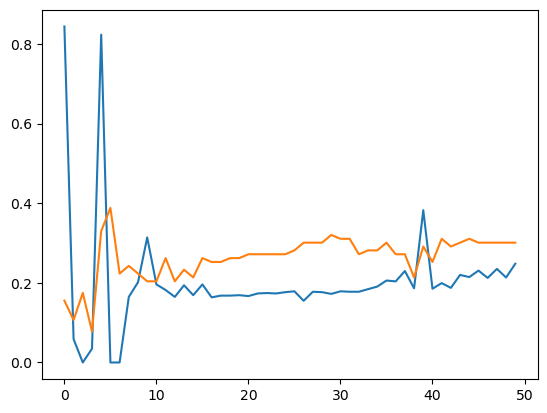

In [28]:
plt.plot(one_layer_history.history["factorized_top_k/top_100_categorical_accuracy"])
plt.plot(one_layer_history.history["val_factorized_top_k/top_100_categorical_accuracy"])

In [29]:
metrics = model.evaluate(cached_test, return_dict=True, verbose=0)

print(
    f"Retrieval top-100 accuracy: {metrics['factorized_top_k/top_100_categorical_accuracy']:.3f}."
)

Retrieval top-100 accuracy: 0.301.


In [30]:
metrics

{'factorized_top_k/top_1_categorical_accuracy': 0.009708737954497337,
 'factorized_top_k/top_5_categorical_accuracy': 0.019417475908994675,
 'factorized_top_k/top_10_categorical_accuracy': 0.029126213863492012,
 'factorized_top_k/top_50_categorical_accuracy': 0.1553398072719574,
 'factorized_top_k/top_100_categorical_accuracy': 0.3009708821773529,
 'loss': 491.1836242675781,
 'regularization_loss': 0.02535788156092167,
 'total_loss': 491.208984375}

In [37]:
def predict_talent(inputs, top_n=3):
    # Create a model that takes in raw query features, and
    index = tfrs.layers.factorized_top_k.BruteForce(model.query_model)
    # recommends movies out of the entire movies dataset.
    index.index_from_dataset(
        talents.batch(128).map(
            lambda x: (
                x["talent_id"],
                model.candidate_model(x),
            )
        )
    )

    # Get recommendations.
    _, titles = index(
        {
            "user_id": np.array([inputs["user_id"]]),
            "user_gender": np.array([inputs["user_gender"]]),
            "user_age": np.array([inputs["user_age"]]),
            "user_location": np.array([inputs["user_location"]]),
            "user_tags": np.array([inputs["user_tags"]]),
            "user_preferences": np.array([inputs["user_preferences"]]),
        }
    )
    
    tf.saved_model.save(index, "../models/recommender_model")

    loaded = tf.saved_model.load("../models/recommender_model")
    # Get recommendations.
    _, titles = loaded(
        {
            "user_id": np.array([inputs["user_id"]]),
            "user_gender": np.array([inputs["user_gender"]]),
            "user_age": np.array([inputs["user_age"]]),
            "user_location": np.array([inputs["user_location"]]),
            "user_tags": np.array([inputs["user_tags"]]),
            "user_preferences": np.array([inputs["user_preferences"]]),
        }
    )

    print("Top {} recommendations for user {}:\n".format(top_n, inputs["user_id"]))
    for i, title in enumerate(titles[0, :top_n].numpy()):
        print("{}. {}".format(i + 1, title.decode("utf-8")))

    return titles

In [38]:
titles = predict_talent(
    dict(ratings_df.loc[0, users_df.columns]),
    5
)

INFO:tensorflow:Assets written to: ../models/recommender_model\assets


INFO:tensorflow:Assets written to: ../models/recommender_model\assets


Top 5 recommendations for user 5de6b455-0a80-4047-90e7-8ddee7ee2bb8:

1. 2323d4a4-f43b-45b8-976c-9ac763685e7a
2. 82040fd4-e978-4baf-95ee-b5ce4a1c4092
3. 44a99da4-3c55-4a41-b277-8dd5c5933165
4. 8e4b7d2e-25a8-4ece-bb9b-83963bf2e8e4
5. 49850020-8586-4d78-ba14-201a31091379


In [40]:
talents_df.loc[talents_df["talent_id"].isin(titles[0, :5].numpy().astype(np.str_)), :].head()

,talent_id,talent_name,talent_gender,talent_birth_date,talent_age,talent_location,talent_tags,talent_description
49,44a99da4-3c55-4a41-b277-8dd5c5933165,Fresesiensi Diah,P,7/6/1985,38,"Kalimantan Selatan, Kotabaru",Riang|Membaca|Sastra|Kreatif|Penulis,Saya adalah seorang penulis dan penyair yang g...
109,82040fd4-e978-4baf-95ee-b5ce4a1c4092,Frizka Adelina Aminah Vivia,P,21/12/2003,20,"Riau, Pekanbaru",Ambisius|Musisi|Memancing|Lari|Kreatif,Pemain cello dengan dedikasi pada musik klasik...
118,8e4b7d2e-25a8-4ece-bb9b-83963bf2e8e4,Putri Aniesyah Suraya Julia,P,25/1/1990,33,"DI Yogyakarta, Yogyakarta",Sabar|Cerdas|Pengajar|Disiplin|Olahraga,Pengajar Pilates yang berdedikasi untuk mening...
144,49850020-8586-4d78-ba14-201a31091379,Mutiya Putri Simanjuntak Mayang,P,6/10/1997,26,"Kalimantan Utara, Tarakan",Kesehatan|Dokter|Disiplin|Perfeksionis|Intelek...,Spesialis penyakit jantung yang fokus pada bid...
183,2323d4a4-f43b-45b8-976c-9ac763685e7a,Putri Azzahra,P,26/12/1987,36,"Sulawesi Utara, Manado",Sabar|Pengajar|Traveling|Ramah|Stylist,Guru dengan semangat untuk mendidik dan mencip...
